<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Initial-Data-Assessment-&amp;-Configuration" data-toc-modified-id="Initial-Data-Assessment-&amp;-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initial Data Assessment &amp; Configuration</a></span><ul class="toc-item"><li><span><a href="#Configure-Datatypes" data-toc-modified-id="Configure-Datatypes-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Configure Datatypes</a></span></li><li><span><a href="#Drop-Constant-Columns" data-toc-modified-id="Drop-Constant-Columns-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Drop Constant Columns</a></span></li><li><span><a href="#Drop-Unneeded-Columns" data-toc-modified-id="Drop-Unneeded-Columns-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Drop Unneeded Columns</a></span></li></ul></li><li><span><a href="#Data-Insights" data-toc-modified-id="Data-Insights-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Insights</a></span><ul class="toc-item"><li><span><a href="#Is-the-unique-count-of-VEHICLEID-correct?-Dublin-Bus-states-publically-that-they-operate-a-fleet-of-1,016-buses" data-toc-modified-id="Is-the-unique-count-of-VEHICLEID-correct?-Dublin-Bus-states-publically-that-they-operate-a-fleet-of-1,016-buses-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Is the unique count of VEHICLEID correct? Dublin Bus states publically that they operate a fleet of 1,016 buses</a></span></li></ul></li><li><span><a href="#Visualise-Inspect-of-Continuous-Features" data-toc-modified-id="Visualise-Inspect-of-Continuous-Features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualise Inspect of Continuous Features</a></span><ul class="toc-item"><li><span><a href="#MINUTES" data-toc-modified-id="MINUTES-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>MINUTES</a></span><ul class="toc-item"><li><span><a href="#There-is-an-unusual-minimum-minutes-value:-negative" data-toc-modified-id="There-is-an-unusual-minimum-minutes-value:-negative-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>There is an unusual minimum minutes value: negative</a></span></li><li><span><a href="#Inspect-Upper-Bound-Outlier-region" data-toc-modified-id="Inspect-Upper-Bound-Outlier-region-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Inspect Upper Bound Outlier region</a></span></li><li><span><a href="#Inspect-Lower-Bound-Outlier-Region" data-toc-modified-id="Inspect-Lower-Bound-Outlier-Region-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Inspect Lower-Bound Outlier Region</a></span></li></ul></li><li><span><a href="#DISTANCE" data-toc-modified-id="DISTANCE-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>DISTANCE</a></span></li></ul></li><li><span><a href="#TRANSFORMATIONS" data-toc-modified-id="TRANSFORMATIONS-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>TRANSFORMATIONS</a></span></li><li><span><a href="#OUTPUTTING-DF-STATE" data-toc-modified-id="OUTPUTTING-DF-STATE-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>OUTPUTTING DF STATE</a></span></li></ul></div>

# Imports

In [1]:
# set the display aspect ratio

from IPython.core.display import display, HTML
display(HTML('<style>.container {width:80% !important;}</style>'))

In [50]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as papr

In [3]:
# Display plots in the notebook

%matplotlib inline

In [4]:
# load custom function for assessing dataframes succinctly

def assess_df(df):
  
    feature_types = {df[df.columns[x]].dtypes.name for x in range(len(df.columns))}
    
  	# print datatypes
  
    print("Datatypes:\n")
    print(df.dtypes)
    print('\n\n')
    
    # print number rows and cols
    print('*' * 50)
    print('ROWS, COLUMNS, NULLS\n')
    print(df.shape[0], "rows in the dataframe.")
    print(df.shape[1], "columns in the dataframe.\n")
    print(df.isnull().sum().sum(), "null values in the dataframe.")
    
    # check duplicate rows & col; print if present
    
    duplicate_rows = df.duplicated(keep=False).sum()
    duplicate_cols = df.index.T.duplicated(keep=False).sum()
    
    print(duplicate_rows, "duplicate rows")
    print(duplicate_cols, "duplicate columns")
    
    if duplicate_rows > 0 or duplicate_cols > 0:
      print(df.loc[df.duplicated()])
	
    print('\n')
    
    # check for constant columns
    
    numeric_cols = list(df.select_dtypes(include=[np.number]).columns.values)
    categorical_cols = list(df.select_dtypes('category').columns.values)
    
    standard_diffs = [df.describe().loc['std', x] for x in numeric_cols]
    
    constant_categorical_column=False
    if 'category' in feature_types:
        for column in categorical_cols:
            if df[column].describe().index.unique == 1:
                constant_categorical_column = True
            
            
    if 0 in standard_diffs:
        print("Constant numeric columns: TRUE")
    else:
        print("Constant numeric columns: FALSE")
  
    if 'category' in feature_types:    
        if constant_categorical_column == True:
            print("Constant categorical columns: TRUE")
        else:
            print("Constant categorical columns: FALSE")

            
    
    print('\n\n')

    
    # feature stats
    print('*' * 50)
    print('DESCRIPTION\n')
    print(df.describe().T)
    print('\n\n')
    print('*' * 50)

    
    # feature stats: categorical
    
    if 'category' in feature_types:
        print('CATEGORICAL DESCRIPTION\n')
        print('\n')
        print(df.select_dtypes(['category']).describe().T)
        print('\n\n')
        print('*' * 50)
    
    # print feature cardinalities
    
    print("FEATURE CARDINALITIES\n")
    column_names = list(df.columns.values)

    print('{0:45}  {1}'.format("Feature", "Distinct Values"))
    print('{0:45}  {1}'.format("-------", "--------------- \n"))

    for c in column_names:
        print('{0:45}  {1}'.format(c, str(len(df[c].unique()))))
    
    print('\n')
    print('*' * 50)
    print('MEMORY\n')
    
    
    print(df.info(memory_usage='deep'))
    print('\n')
    print(df.memory_usage(deep=True))
    print('\n')
    print('*' * 50)
    print('HEAD\n')
    print(df.head(10))
    print('\n')
    print('*' * 50)
    print('TAIL\n')
    print(df.tail(10))

# Initial Data Assessment & Configuration

In [19]:
# # load the original .txt file

# path = \
# '/home/student/data/original_raw_data_bus_total/rt_vehicles_DB_2018.txt'
# vehicles = pd.read_csv(path, sep=';')

In [5]:
path = '/tmp/ssh_mount/rt_vehicles_DB_2018.txt'

vehicles = pd.read_csv(path, sep=';')

In [6]:
# assess the dataframe

assess_df(vehicles)

Datatypes:

DATASOURCE       object
DAYOFSERVICE     object
VEHICLEID         int64
DISTANCE          int64
MINUTES           int64
LASTUPDATE       object
NOTE            float64
dtype: object



**************************************************
ROWS, COLUMNS, NULLS

272622 rows in the dataframe.
7 columns in the dataframe.

272622 null values in the dataframe.
0 duplicate rows
0 duplicate columns


Constant numeric columns: FALSE



**************************************************
DESCRIPTION

              count          mean            std        min        25%  \
VEHICLEID  272622.0  1.928436e+06  810440.716935  1000110.0  1000948.0   
DISTANCE   272622.0  1.774863e+05   71334.432383        0.0   126765.0   
MINUTES    272622.0  4.559764e+04   14881.389868   -70145.0    39380.0   
NOTE            0.0           NaN            NaN        NaN        NaN   

                 50%         75%        max  
VEHICLEID  2172252.0  2693217.00  3394131.0  
DISTANCE    177420.0   227126.25 

## Configure Datatypes

In [7]:
# change DAYOFSERVICE to datetime

vehicles.loc[:, 'DAYOFSERVICE'] = vehicles.loc[:, 'DAYOFSERVICE'].apply(lambda x: pd.to_datetime(x, format='%d-%b-%y %H:%M:%S'))

In [8]:
# change LASTUPDATE to datetime

vehicles.loc[:, 'LASTUPDATE'] = vehicles.loc[:, 'LASTUPDATE'].apply(lambda x: pd.to_datetime(x, format='%d-%b-%y %H:%M:%S'))

In [9]:
# Change low cardinality – categorical meaning – features to category type
# any cardinality representing under 50% of the size of the dataframe is a candidate for
# conversion to the categorical datatype.

vehicles = vehicles.astype({'DATASOURCE':'category', 'VEHICLEID':'category'})

## Drop Constant Columns

In [10]:
vehicles.drop('NOTE', axis=1, inplace=True)

In [11]:
vehicles.drop('DATASOURCE', axis=1, inplace=True)

## Drop Unneeded Columns

In [12]:
vehicles

,DAYOFSERVICE,VEHICLEID,DISTANCE,MINUTES,LASTUPDATE
0,2018-11-23,3303848,286166,58849,2018-12-04 08:03:09
1,2018-11-23,3303847,259545,56828,2018-12-04 08:03:09
2,2018-02-28,2868329,103096,40967,2018-03-08 10:35:59
3,2018-02-28,2868330,147277,43599,2018-03-08 10:35:59
4,2018-02-28,2868331,224682,40447,2018-03-08 10:35:59
5,2018-02-28,2868332,19499,6289,2018-03-08 10:35:59
6,2018-02-28,2868333,133014,43647,2018-03-08 10:35:59
7,2018-02-28,2868334,168964,47167,2018-03-08 10:35:59
8,2018-02-28,2868335,360842,55477,2018-03-08 10:35:59
9,2018-02-28,2868336,139959,39599,2018-03-08 10:35:59


In [13]:
assess_df(vehicles)

Datatypes:

DAYOFSERVICE    datetime64[ns]
VEHICLEID             category
DISTANCE                 int64
MINUTES                  int64
LASTUPDATE      datetime64[ns]
dtype: object



**************************************************
ROWS, COLUMNS, NULLS

272622 rows in the dataframe.
5 columns in the dataframe.

0 null values in the dataframe.
0 duplicate rows
0 duplicate columns


Constant numeric columns: FALSE
Constant categorical columns: FALSE



**************************************************
DESCRIPTION

             count           mean           std      min       25%       50%  \
DISTANCE  272622.0  177486.328466  71334.432383      0.0  126765.0  177420.0   
MINUTES   272622.0   45597.643220  14881.389868 -70145.0   39380.0   46994.5   

                75%       max  
DISTANCE  227126.25  473864.0  
MINUTES    57911.00   76651.0  



**************************************************
CATEGORICAL DESCRIPTION



            count  unique      top  freq
VEHICLEID  272622  

# Data Insights

## Is the unique count of VEHICLEID correct? Dublin Bus states publically that they operate a fleet of 1,016 buses

In [14]:
# find the number of unique vehicle IDs

len(set(vehicles.VEHICLEID.value_counts().index))

1152

In [15]:
# visual inspection of values
# hidden for presentation


# print(set(vehicles.VEHICLEID.value_counts().index))

Conclusion: Either the Dublin Bus public information is incorrect, or vehicles have been added (possibly retired) in the 2018 period.

# Visualise Inspect of Continuous Features

## MINUTES

### There is an unusual minimum minutes value: negative

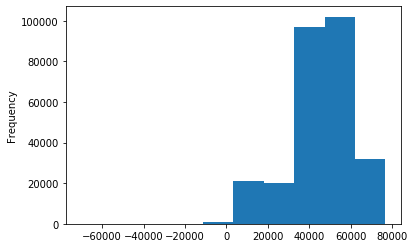

In [16]:
# histogram representing MINUTES value distribution

plt.figure()
vehicles.MINUTES.plot(kind='hist')
plt.savefig("Histogram MINUTES value distribution")

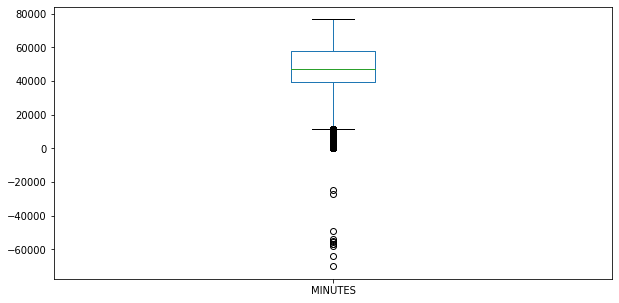

In [17]:
# boxplot representing MINUTES value distribution

plt.figure()
vehicles.MINUTES.plot(kind='box', figsize=(10,5))
plt.savefig("Boxplt MINUTES value distribution")

In [18]:
# statistics on the anomolous negative values

print(vehicles.MINUTES.loc[vehicles.MINUTES <0])
print("\n\n", len(vehicles.MINUTES.loc[vehicles.MINUTES <0]))

35337    -63660
63322    -49317
73317    -26906
74817    -56723
75516    -56686
86099    -53576
155328   -55863
160494   -55245
160954   -58114
225571   -24695
266506   -70145
Name: MINUTES, dtype: int64


 11


In [19]:
# the percentage of rows affected with negative values

print("% rows affected by a negative MINUTES value:", round(11/len(vehicles)*100, 3), "%")

% rows affected by a negative MINUTES value: 0.004 %


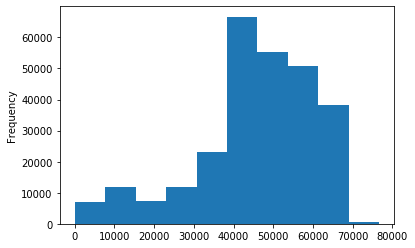

In [20]:
# corrected plot, with the negative values removed

plt.figure()
vehicles.MINUTES.loc[vehicles.MINUTES >0].plot(kind='hist')
plt.savefig("originalMinutes_corrected_for_negs_hist")

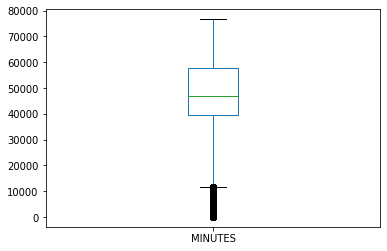

In [21]:
# corrected plot, with the negative values removed

plt.figure()
vehicles.MINUTES.loc[vehicles.MINUTES >0].plot(kind='box')
plt.savefig("originalMinutes_corrected_for_negs_box")

### Inspect Upper Bound Outlier region

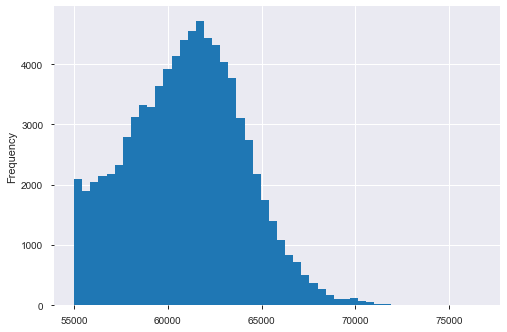

In [57]:
# plot, focusing on the outlier region

plt.figure()
vehicles.MINUTES.loc[vehicles.MINUTES >55000].plot(kind='hist', bins=50)
plt.savefig("originalMINUTES_outlier_region2")

The peak at 70000 represents a likely veracious phenomenon: the conclusion of a whole day of service. 70000 minutes is equivalent to 19.5 hrs of operation. Dublin Bus operates for 19 hours per day.

In [23]:
# The number of rows, excluding anaomolous negative values, for which MINUTES is greater than 70000

len(vehicles.MINUTES.loc[vehicles.MINUTES > 70000])

278

In [24]:
# percentage of values greater than 6700

print(round(len(vehicles.MINUTES.loc[(vehicles.MINUTES > 0) & (vehicles.MINUTES > 70000)]) / len(vehicles) * 100, 3), "%")

0.102 %


Comparison with an upper bound: a vehicle operating all day, and beginning a 1.5hr journey at the close of day (=73800 s)

In [25]:
# find the number of instances having a value above this upper-threshold

len(vehicles.MINUTES.loc[vehicles.MINUTES > 73800])

8

In [26]:
# find the percentage of rows affected with a value about this upper-threshold

print(round(len(vehicles.MINUTES.loc[vehicles.MINUTES > 73800]) / len(vehicles) * 100, 3), "%")

0.003 %


### Inspect Lower-Bound Outlier Region

This range represents between 0hrs of operation and 9.7hrs of operation. The mean is 12.6hrs of operation

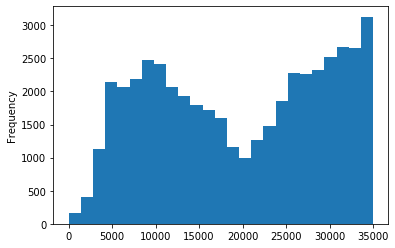

In [27]:
plt.figure()
vehicles.MINUTES.loc[(vehicles.MINUTES > 0) & (vehicles.MINUTES < 35000)].plot(kind='hist', bins=25)
plt.savefig("originalMinutes_lower_bound")

In [28]:
# percentage of vehicle operational days that are under an hour

print(round(len(vehicles.MINUTES.loc[(vehicles.MINUTES > 0) & (vehicles.MINUTES < 3600)]) / len(vehicles) * 100, 3), "%")

0.431 %


In [29]:
# number of vehicle operational days that are under an hour

len(vehicles.MINUTES.loc[(vehicles.MINUTES > 0) & (vehicles.MINUTES < 3600)])

1175

In [30]:
# percentage of vehicle operational days that are under 3 hours

print(round(len(vehicles.MINUTES.loc[(vehicles.MINUTES > 0) & (vehicles.MINUTES < 3600*3)]) / len(vehicles) * 100, 3), "%")

4.532 %


In [31]:
# number of vehicle operational days that are under 3 hours

len(vehicles.MINUTES.loc[(vehicles.MINUTES > 0) & (vehicles.MINUTES < 3600*3)])

12356

In [32]:
# percentage of vehicle operational days that are under 6 hours

print(round(len(vehicles.MINUTES.loc[(vehicles.MINUTES > 0) & (vehicles.MINUTES < 3600*6)]) / len(vehicles) * 100, 3), "%")

9.07 %


Note: Investigate whether these unexpected values belong to certain routes – if values are included in Analytics Base Table.

For now, investigate whether they have a relationship with DAYOFSERVICE.

In [33]:
under1hr = vehicles.loc[(vehicles.MINUTES > 0) & (vehicles.MINUTES < 3600)]

In [34]:
under1hr.head()

,DAYOFSERVICE,VEHICLEID,DISTANCE,MINUTES,LASTUPDATE
1053,2018-07-27,3265699,27545,490,2018-08-17 03:39:00
1640,2018-08-22,3265667,28140,2297,2018-08-30 09:47:32
1866,2018-07-16,2868391,43935,1264,2018-07-24 14:51:47
2164,2018-07-26,3265706,136774,2452,2018-08-17 03:29:11
2466,2018-07-30,3265715,43059,2890,2018-08-18 17:33:02


In [35]:
# % of vehicles that have had a operational day under 1hr

round(len(under1hr.VEHICLEID.unique()) / len(vehicles.VEHICLEID.unique()),2)

0.55

In [36]:
# % days that have included a vehicle's operational day of under 1hr

round(len(under1hr.DAYOFSERVICE.unique()) / len(vehicles.DAYOFSERVICE.unique()),2)

0.94

In [37]:
# distribution of operation durations for those under 1hr

under1hr.MINUTES.describe()

count    1175.000000
mean     2545.084255
std       920.793908
min         1.000000
25%      2096.500000
50%      2826.000000
75%      3268.000000
max      3598.000000
Name: MINUTES, dtype: float64

Half of all equal-to or under 1hr operation days (total=1175) have been equal-to or less than 47min; three-quarters have been equal-to or less than 54min. 

## DISTANCE

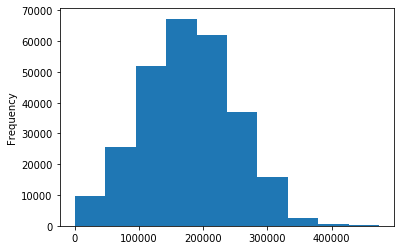

In [38]:
# plot distribution of DISTANCE values: histogram

plt.figure()
vehicles.DISTANCE.plot(kind='hist')
plt.savefig("originalDISTANCE_hist")

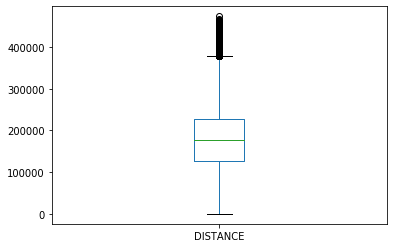

In [39]:
# plot distribution of DISTANCE values: boxplot

plt.figure()
vehicles.DISTANCE.plot(kind='box')
plt.savefig("originalDISTANCE_box")

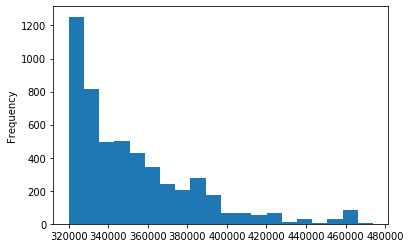

In [40]:
# distribution of values in the – roughly estimated – outlier region

plt.figure()
vehicles.DISTANCE.loc[(vehicles.DISTANCE > 320000) &\
        (vehicles.DISTANCE <= vehicles.DISTANCE.max())].plot(kind='hist', bins=20)
plt.savefig("originalDistance_outlier_region")

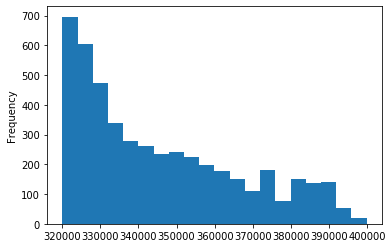

In [41]:
# a closer look at where the distribution is disturbed

plt.figure()
vehicles.DISTANCE.loc[(vehicles.DISTANCE > 320000)&(vehicles.DISTANCE < 400000)].plot(kind='hist', bins=20)
plt.savefig("originalDistance_outlier_region_closer")

Anomolous values from ~Distance>370000

In [42]:
# number of entires in the outlier region

print("\n\n", len(vehicles.DISTANCE.loc[vehicles.DISTANCE > 370000]))



 1211


In [43]:
# percentage of entries in the outlier region

print(round(len(vehicles.DISTANCE.loc[vehicles.DISTANCE > 370000]) / len(vehicles) * 100, 2), "%")

0.44 %


In [44]:
len(vehicles.DISTANCE.loc[(vehicles.DISTANCE > 430000) & (vehicles.DISTANCE <= vehicles.DISTANCE.max())])

153

In [45]:
print(round(len(vehicles.DISTANCE.loc[(vehicles.DISTANCE > 430000) &\
                        (vehicles.DISTANCE <= vehicles.DISTANCE.max())]) / len(vehicles) * 100, 2), "%")

0.06 %


# TRANSFORMATIONS

In [46]:
vehicles.head()

,DAYOFSERVICE,VEHICLEID,DISTANCE,MINUTES,LASTUPDATE
0,2018-11-23,3303848,286166,58849,2018-12-04 08:03:09
1,2018-11-23,3303847,259545,56828,2018-12-04 08:03:09
2,2018-02-28,2868329,103096,40967,2018-03-08 10:35:59
3,2018-02-28,2868330,147277,43599,2018-03-08 10:35:59
4,2018-02-28,2868331,224682,40447,2018-03-08 10:35:59


In [47]:
vehicles.drop('LASTUPDATE', axis=1, inplace=True)

In [48]:
vehicles.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272622 entries, 0 to 272621
Data columns (total 4 columns):
DAYOFSERVICE    272622 non-null datetime64[ns]
VEHICLEID       272622 non-null category
DISTANCE        272622 non-null int64
MINUTES         272622 non-null int64
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 6.8 MB


# OUTPUTTING DF STATE

In [49]:
vehicles.to_feather('/tmp/ssh_mount/rt_vehicles/020719_vehicles.feather')